In [16]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_30/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>

# <h1><center><ins>EVALUACIÓN DE MODELOS EN PROBLEMAS DE CLASIFICACIÓN</ins></center></h1>
<h1><center>Checkpoint:</center></h1>
<img src="img/01_Ev_Modelos_caratula.jpeg" alt="Drawing" style="width: 300px;"/>

<a id="tabla_contenidos"></a> 
## Tabla de Contenidos

### <a href='#section_objetivos'>0. Objetivos de la Notebook</a>


### <a href='#section_repaso'>1. Lo que tenés que hacer es...</a>
- #### <a href='#section_reg_vs_clas'>1.1 ...cargar el dataset, instanciar y entrenar un modelo de KNeighborsClassifier:</a>
- #### <a href='#section_outcomes'>1.2 ...evaluar el modelo:</a>
- #### <a href='#section_matriz_confusion'>1.3 ...¿qué podemos concluir?:</a>


### <a href='#section_metricas'>2. BONUS</a>
---

<a id="section_objetivos"></a> 
## 0. Objetivos de la Notebook

<div id="caja11" style="float:left;width: 100%;">
  <div style="float:left;width: 9%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;">
      <label>Poner en práctica lo aprendido en la notebook de práctica guiada.</label>
  <div style="float:left;width: 85%;">
      <label>Es importante que antes de la clase resuelvan esta notebook ya que es fundamental que sepan utilizar las herramientas que vimos en la práctica guiada para después trabajar el caso práctico en la clase.</label>        
</div>    
</div>

<a href='#tabla_contenidos'>Volver a TOC</a>

---

<a id="section_repaso"></a> 
## 1. Lo que tenés que hacer es...

<a id="section_reg_vs_clas"></a> 
### 1.1 ...cargar el dataset, instanciar y entrenar un modelo de [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html):

Importá el dataset que utilizamos en la práctica guiada **HR_comma_sep.csv**

Instanciá un modelo de vecinos más cercanos (utilicen el número de vecinos que viene por default en [`scikit-learn`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html))

**CUIDADO:** revisá en la notebook de la **Práctica Guiada** todos los pasos previos que hicimos antes de instanciar y entrenar el modelo. Y utilizá los mismos predictores que usámos en la **Práctica Guiada**

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


In [18]:
# Carga en un dataframe el data set...
df = pd.read_csv('../Data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
# Instanciá y entrená el modelo...
categorics_columns = ['sales','salary']
df_categoricas=pd.get_dummies(df[categorics_columns], drop_first=True)
df2=df.drop(['sales','salary','left'], axis=1)
X = pd.concat([df2,df_categoricas], axis=1)
y = df.left

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

esc=StandardScaler()
X_std_train = esc.fit_transform(X_train) 
X_std_test = esc.transform(X_test)

knn=KNeighborsClassifier()
knn.fit(X_std_train,y_train)

KNeighborsClassifier()

In [51]:
y_pred_knn=knn.predict(X_std_test)
y_pred_knn

array([0, 0, 0, ..., 0, 1, 1])

<a id="section_outcomes"></a> 
### 1.2 ...evaluar el modelo:

A lo que vinimos: ahora tenés que evaluar el modelo con las distintas métricas que vimos en la **Práctica guiada**


In [52]:
# ¿Cómo es la distribución de los datos en train y test?
y_train.value_counts(normalize=True)

0    0.762165
1    0.237835
Name: left, dtype: float64

In [53]:
y_test.value_counts(normalize=True)

0    0.761414
1    0.238586
Name: left, dtype: float64

In [54]:
# Matriz de confusión
confusion_matrix(y_test,y_pred_knn)

array([[3578,  191],
       [ 133, 1048]])

In [55]:
# Accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_knn)

0.9345454545454546

In [56]:
# Sensitivity o recall_score
from sklearn.metrics import recall_score

recall_score(y_test,y_pred_knn)


0.8873835732430144

In [57]:
# Specificity = TN/TN+FP

3578/(3578+191)


0.9493234279649775

In [59]:
# Precision
from sklearn.metrics import precision_score

precision_score(y_test,y_pred_knn)


0.8458434221146085

In [62]:
# F1-Score

from sklearn.metrics import f1_score

f1_score(y_test,y_pred_knn)

0.8661157024793389

In [28]:
# ROC Curve y AUC

In [67]:
y_pred_knn_prob = knn.predict_proba(X_std_test)
y_pred_knn_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

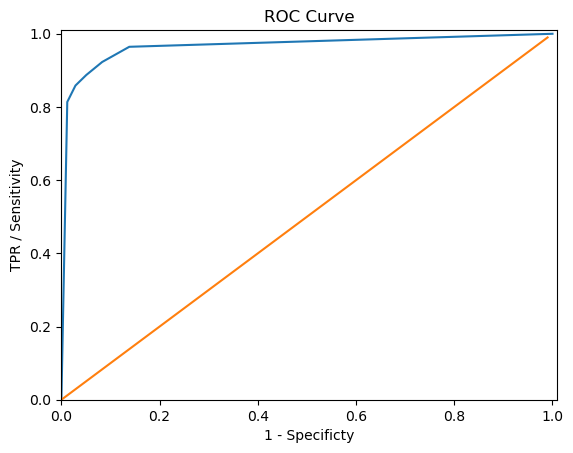

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve

fpr,tpr,thr=roc_curve(y_test,y_pred_knn_prob[:,1])

df_plot = pd.DataFrame({'FPR':fpr,
                        'TPR':tpr,
                        'THRESHOLD':thr})

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_plot['FPR'],df_plot['TPR'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [76]:
from sklearn.metrics import auc

auc(df_plot['FPR'],df_plot['TPR'])

0.965881700372642

<a id="section_matriz_confusion"></a> 
### 1.3 ...¿qué podemos concluir?:

¿Cómo le fue a este modelo respecto de los que evaluamos en la **Práctica Guiada**?

Este modelo le fue mejor, lo vemos por ejemplo con AUC, donde aqui tenemos 0.96 y antes teniamos 0.84 de NB y 0.79 de LR

<a href='#tabla_contenidos'>Volver a TOC</a>

---

<a id="section_metricas"></a> 
## 2. BONUS

<div id="caja11" style="float:left;width: 100%;">
  <div style="float:left;width: 9%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;">
      <label>¿Te animás a entrenar un modelo con otro <b>número de vecinos</b> (elegí el que vos quieras) y compararlo con el que hiciste antes (podés usar la Curva ROC para verlos a ambos juntos)?.</label>
</div>    
</div>

<a href='#tabla_contenidos'>Volver a TOC</a>

In [79]:
knn_2 = KNeighborsClassifier(n_neighbors=10)

knn_2.fit(X_std_train, y_train)
y_pred_2=knn_2.predict(X_std_test)

In [80]:
y_pred_2_proba = knn_2.predict_proba(X_std_test)

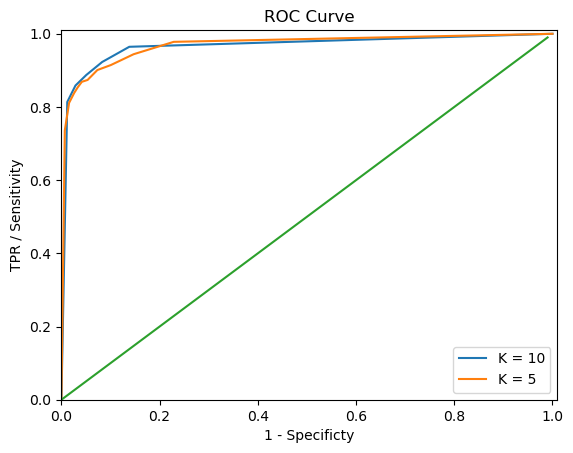

In [91]:
fpr_2,tpr_2,th_2=roc_curve(y_test, y_pred_2_proba[:,1])

df_toplot_2 = pd.DataFrame({'FPR_2':fpr_2,'TPR_2':tpr_2,'THRESHOLD':th_2})

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_plot['FPR'],df_plot['TPR'])
plt.plot(df_toplot_2['FPR_2'],df_toplot_2['TPR_2'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['K = 10','K = 5'])
plt.show()

In [92]:
auc(df_toplot_2.FPR_2,df_toplot_2.TPR_2 )

0.9683381226903642